In [7]:
from mdagent import MDAgent
import os

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-08-19
time: 15:42:40


In [3]:
model = "accounts/fireworks/models/llama-v3p1-405b-instruct"

agent = MDAgent(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    top_k_tools="all"
)

print("LLM: ", agent.llm.model_name,"\nTemperature: ", agent.llm.temperature)

LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [4]:
prompt10 = "Simulate protein 1ZNI at 300 K for 1 ns and calculate the RMSD."
answer = agent.run(prompt10)

Thought: First, I need to download the PDB file for protein 1ZNI.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```PDB file found with this ID: 1ZNI
Next, I need to set up and run a simulation of protein 1ZNI at 300 K for 1 ns.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_154244",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 1000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```Building system...
About to cre

In [5]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 33.34 minutes


In [8]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_91
Files found in registry: 1ZNI_154244: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_154244
 1ZNI_154254: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_154258: Initial positions for simulation sim0_154258
 sim0_154258: Basic Simulation of Protein 1ZNI_154254
 rec0_154259: Simulation trajectory for protein 1ZNI_154254 and simulation sim0_154258
 rec1_154259: Simulation state log for protein 1ZNI_154254 and simulation sim0_154258
 rec2_154259: Simulation pdb frames for protein 1ZNI_154254 and simulation sim0_154258
 rmsd_1ZNI: RMSD for 1ZNI
 fig0_161557: RMSD plot for 1ZNI


In [9]:
#ensure all files are in path registry
assert all(n in paths_and_descriptions for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [10]:
# let's see if we can't grab the plot
import re
import os
match = re.search(r"fig0_\d+", paths_and_descriptions)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

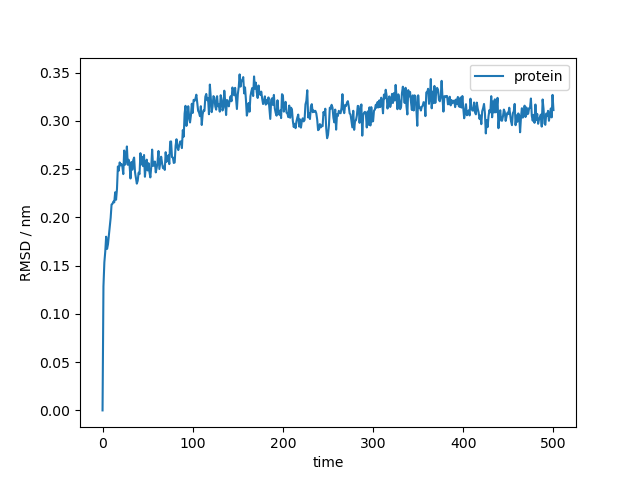

In [12]:
from IPython.display import Image

Image(filename=plot_path)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3.  Completed without Hallucination ✅
4. Logic make sense ✅
5.  Correct Answer ✅
